[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb)

## 0. Preperation 準備工作

- Install latest version of SAHI and ultralytics:
- 安裝最新版本的 SAHI 和 ultralytics：

In [1]:
# !pip install -U torch sahi ultralytics
# !pip install -U requirements.txt

In [2]:
import os
p = os.getcwd()

- Import required modules:
- 導入所需模組：

In [3]:
# arrange an instance segmentation model for test
from sahi.utils.yolov8 import (
    download_yolov8s_model, download_yolov8s_seg_model
)

from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a yolov8 model and two test images:
- 下載yolov8模型和兩個測試圖像：

In [4]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov8_model_path = p +"/yolov8s.pt"
download_yolov8s_model(yolov8_model_path)

# download test images into demo_data folder
# download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
# download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv8 Model
使用 YOLOv8 模型進行標準推理

- Instantiate a detection model by defining model weight path and other parameters:
- 透過定義模型權重路徑和其他參數來實例化偵測模型：

In [5]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:
- 透過向 get_prediction 函數提供影像路徑和DetectionModel 實例來執行預測：

In [6]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:
- 或透過向 get_prediction 函數提供 numpy 影像和DetectionModel 實例來執行預測：

In [7]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:
- 可視化原始影像上的預測邊界框和遮罩：

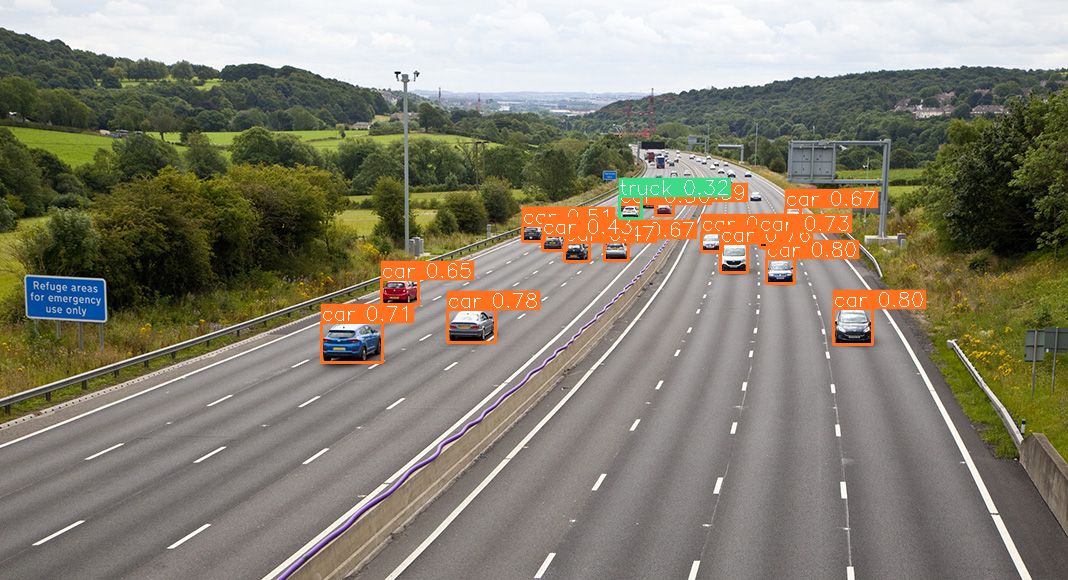

In [8]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv8 Model 使用 YOLOv8 模型進行切片推理

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:
- 要執行切片預測，我們需要指定切片參數。在此範例中，我們將對重疊率為 0.2 的 256x256 切片執行預測：

In [9]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


- Visualize predicted bounding boxes and masks over the original image:
- 可視化原始影像上的預測邊界框和遮罩：

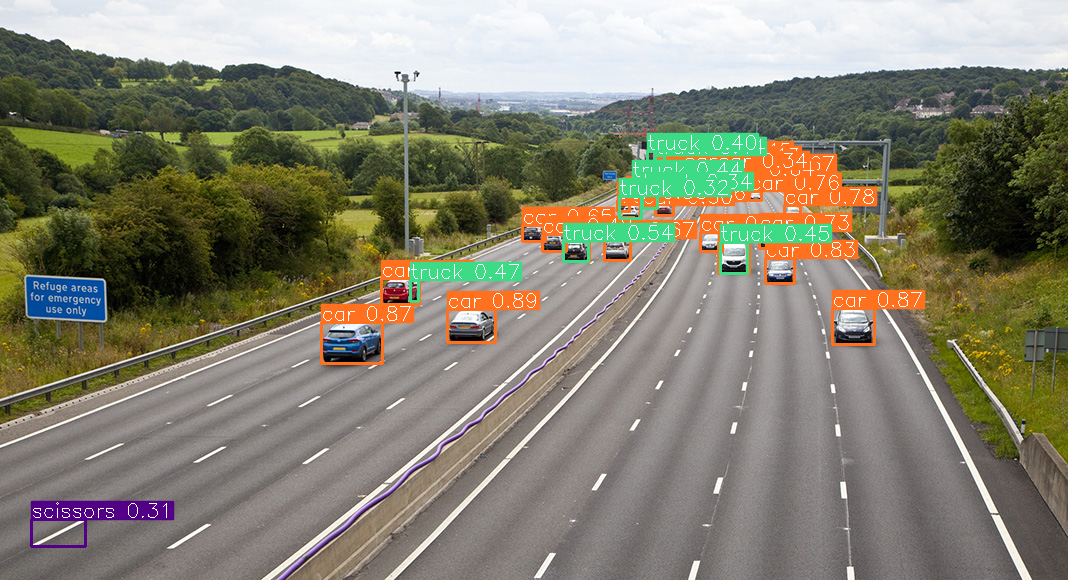

In [10]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result 預測結果

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:
- 預測回傳為 [sahi.prediction.PredictionResult](sahi/prediction.py)，您可以透過下列方式存取物件預測清單：

In [11]:
object_prediction_list = result.object_prediction_list

In [12]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(447.674072265625, 309.5724792480469, 495.7220458984375, 342.0692138671875), w: 48.0479736328125, h: 32.496734619140625>,
    mask: None,
    score: PredictionScore: <value: 0.8857608437538147>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:
- ObjectPrediction 可以轉換為 [COCO 註解](https://cocodataset.org/#format-data) 格式：

In [13]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447.674072265625,
   309.5724792480469,
   48.0479736328125,
   32.496734619140625],
  'score': 0.8857608437538147,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1561},
 {'image_id': None,
  'bbox': [321.2298889160156,
   322.0831298828125,
   61.74859619140625,
   41.10981750488281],
  'score': 0.8725773692131042,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2538},
 {'image_id': None,
  'bbox': [832.658935546875,
   308.4786148071289,
   41.43067169189453,
   36.40044403076172],
  'score': 0.8661473989486694,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1508}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [14]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447.674072265625,
   309.5724792480469,
   48.0479736328125,
   32.496734619140625],
  'score': 0.8857608437538147,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1561},
 {'image_id': 1,
  'bbox': [321.2298889160156,
   322.0831298828125,
   61.74859619140625,
   41.10981750488281],
  'score': 0.8725773692131042,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2538},
 {'image_id': 1,
  'bbox': [832.658935546875,
   308.4786148071289,
   41.43067169189453,
   36.40044403076172],
  'score': 0.8661473989486694,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1508}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:
- ObjectPrediction 可以轉換為 [imantics](https://github.com/jsbroks/imantics) 註解格式：

In [15]:
#!pip install -U imantics
# ImportError: Please run "pip install -U imantics" to install imantics first for imantics conversion.

In [16]:
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:
- ObjectPrediction 可以轉換為 [fiftyone](https://github.com/voxel51/fiftyone) 偵測格式：

In [17]:
#!pip install -U fiftyone -i https://pypi.tuna.tsinghua.edu.cn/simple

In [18]:
result.to_fiftyone_detections()[:3]

[<Detection: {
     'id': '66cd839763d9a349dc3081d1',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.41917047964946164,
         0.5337456538759429,
         0.04498873935656601,
         0.056028852791621765,
     ],
     'mask': None,
     'confidence': 0.8857608437538147,
     'index': None,
 }>,
 <Detection: {
     'id': '66cd839763d9a349dc3081d2',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.3007770495468311,
         0.5553157411772629,
         0.057817037632402854,
         0.07087899569807382,
     ],
     'mask': None,
     'confidence': 0.8725773692131042,
     'index': None,
 }>,
 <Detection: {
     'id': '66cd839763d9a349dc3081d3',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.7796431980775983,
         0.5318596807019463,
         0.03879276375645555,
         0.06275938625993399,
     ],
     'mask': None,
     'confidence': 0

## 4. Batch Prediction 批次預測

- Set model and directory parameters:
- 設定模型和目錄參數：

In [19]:
model_type = "yolov8"
model_path = yolov8_model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:
- 對給定資料夾執行切片推理：

In [20]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|                                                             | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:  33%|█████████████████▋                                   | 1/3 [00:01<00:02,  1.26s/it]

Prediction time is: 1166.65 ms
Performing prediction on 15 slices.


Performing inference on images:  67%|███████████████████████████████████▎                 | 2/3 [00:02<00:01,  1.16s/it]

Prediction time is: 1024.04 ms
Performing prediction on 20 slices.


Performing inference on images: 100%|█████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.26s/it]

Prediction time is: 1377.61 ms
Prediction results are successfully exported to runs/predict/exp


# 5. Segmentation 分割

Run above examples for segmentation model.
運行上面的分割模型範例。

In [21]:
#download YOLOV8S model to 'models/yolov8s.pt'
# yolov8_seg_model_path = "models/yolov8s-seg.pt"
yolov8_seg_model_path = "yolov8n-seg.pt"
download_yolov8s_seg_model(yolov8_seg_model_path)

In [22]:
detection_model_seg = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_seg_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

In [23]:
im = read_image("demo_data/small-vehicles1.jpeg")
h = im.shape[0]
w = im.shape[1]

result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model_seg, full_shape=(h, w))

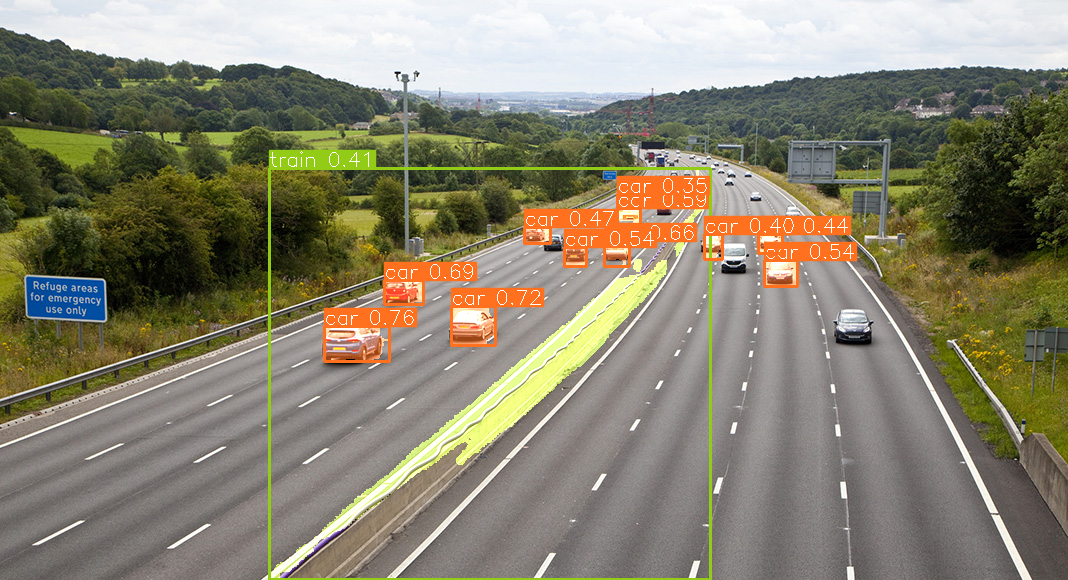

In [24]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [25]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model_seg,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


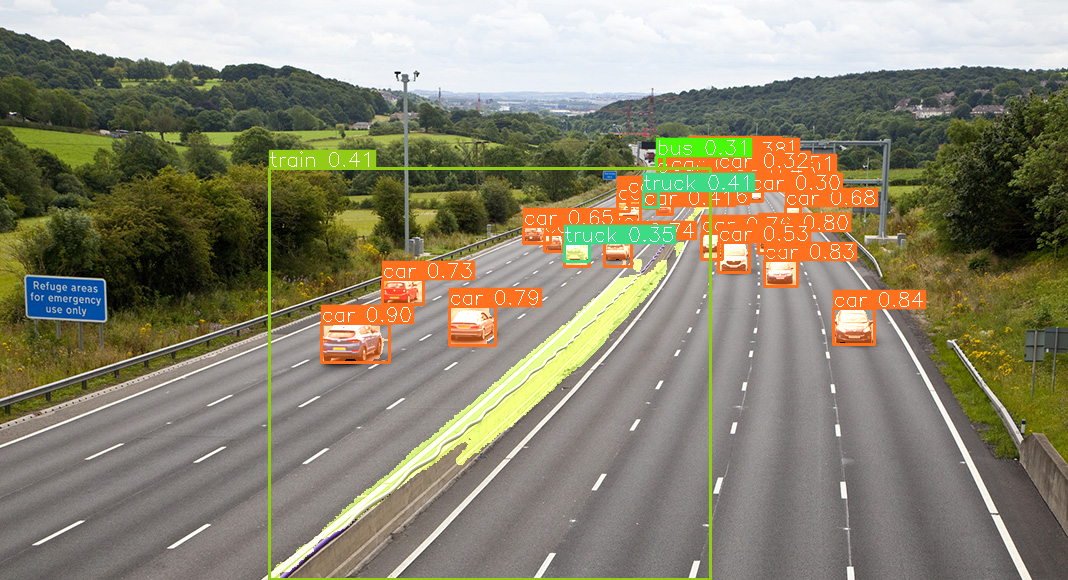

In [26]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [27]:
object_prediction_list = result.object_prediction_list
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(321, 323, 389, 362), w: 68, h: 39>,
    mask: <sahi.annotation.Mask object at 0x7ff8e6920730>,
    score: PredictionScore: <value: 0.8996676206588745>,
    category: Category: <id: 2, name: car>>

In [28]:
object_prediction_list[0].mask.segmentation

[[334,
  325,
  333,
  325,
  332,
  326,
  324,
  326,
  324,
  336,
  323,
  336,
  323,
  337,
  322,
  338,
  321,
  338,
  321,
  357,
  322,
  357,
  323,
  358,
  323,
  360,
  323,
  361,
  324,
  361,
  325,
  362,
  326,
  362,
  328,
  362,
  330,
  362,
  331,
  361,
  331,
  360,
  344,
  360,
  346,
  358,
  354,
  358,
  355,
  359,
  356,
  360,
  357,
  360,
  359,
  360,
  360,
  361,
  361,
  361,
  364,
  361,
  365,
  360,
  372,
  360,
  374,
  358,
  378,
  358,
  379,
  357,
  379,
  355,
  381,
  353,
  381,
  351,
  381,
  350,
  382,
  349,
  382,
  345,
  383,
  345,
  383,
  343,
  382,
  342,
  384,
  340,
  389,
  340,
  389,
  339,
  384,
  339,
  383,
  338,
  382,
  338,
  381,
  337,
  381,
  336,
  380,
  335,
  380,
  333,
  379,
  332,
  379,
  326,
  370,
  326,
  370,
  325,
  369,
  325,
  368,
  324,
  368,
  323,
  335,
  323,
  335,
  324]]

In [29]:
object_prediction_list[1].mask.segmentation

[[836,
  342,
  838,
  342,
  839,
  342,
  840,
  341,
  844,
  341,
  845,
  342,
  861,
  342,
  862,
  342,
  863,
  342,
  864,
  342,
  865,
  343,
  868,
  343,
  868,
  344,
  870,
  344,
  870,
  343,
  871,
  342,
  871,
  341,
  871,
  340,
  872,
  339,
  872,
  338,
  872,
  334,
  872,
  332,
  872,
  329,
  872,
  325,
  871,
  325,
  872,
  324,
  872,
  323,
  873,
  322,
  874,
  322,
  874,
  321,
  870,
  321,
  868,
  319,
  867,
  318,
  867,
  317,
  866,
  316,
  866,
  315,
  866,
  314,
  865,
  313,
  865,
  312,
  863,
  310,
  863,
  308,
  840,
  308,
  840,
  310,
  839,
  311,
  838,
  312,
  838,
  313,
  837,
  314,
  836,
  315,
  836,
  317,
  836,
  318,
  835,
  319,
  834,
  319,
  833,
  319,
  833,
  337,
  834,
  337,
  834,
  339,
  835,
  340,
  835,
  341,
  835,
  342]]

Sliced predictions are much better
切片預測好得多

In [30]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|                                                             | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:  33%|█████████████████▋                                   | 1/3 [00:01<00:02,  1.23s/it]

Prediction time is: 1134.34 ms
Performing prediction on 15 slices.


Performing inference on images:  67%|███████████████████████████████████▎                 | 2/3 [00:02<00:01,  1.11s/it]

Prediction time is: 963.01 ms
Performing prediction on 20 slices.


Performing inference on images: 100%|█████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.21s/it]

Prediction time is: 1304.36 ms
Prediction results are successfully exported to runs/predict/exp2


# END.